<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/02_neural_network_classification_with_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [16]:
import tensorflow as tf

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# 3. Check the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

# 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
# Create date to view and fit
from sklearn.datasets import make_moons

# Make 1000 samples
n_samples = 1000

# Create moon
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
X[:10], y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
# Visualize our data
import pandas as pd
moon = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moon

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


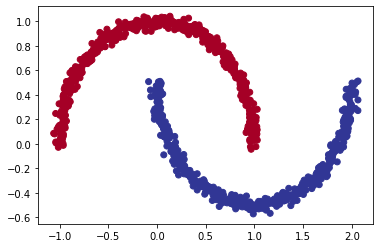

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Split into train data and test data
train_data, train_labels = X[:800], y[:800]
test_data, test_labels = X[800:], y[800:]

In [ ]:
train_data.shape, train_labels.shape

((800, 2), (800,))

In [ ]:
# Let try our data with model_1
history = model_1.fit(train_data, train_labels, epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 3ms/step - loss: 0.6907 - accuracy: 0.5325
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6850
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.7287
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.7788
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.8175
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.8263
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8850
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8938
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9087
Epoch 11/20
25/25 [

In [ ]:
# Evaluate our model
model_1.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9100


[0.19419912993907928, 0.9100000262260437]

Wow, 91% at the first time, quite good

Text(0.5, 1.0, 'Model_1 loss curves')

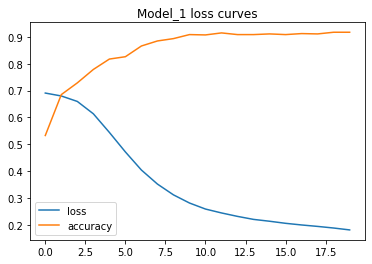

In [ ]:
# Plot the training curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 loss curves")

In [ ]:
# Fiding the ideal learning rate

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

# 4. Fit the model (50 epochs)
history_2 = model_2.fit(train_data, train_labels, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.4963
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4650
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5400
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5863
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6137
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6438
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.7550
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.8650
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.8612
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.8687
Epoch 11/50
25/25 [

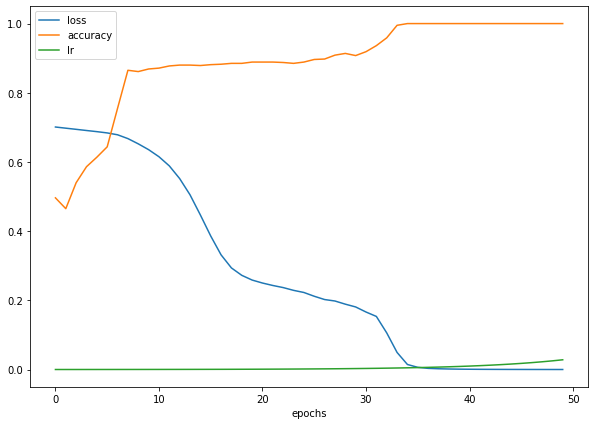

In [ ]:
# Check out the hisroty
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs")


Text(0.5, 1.0, 'Learning rate vs loss')

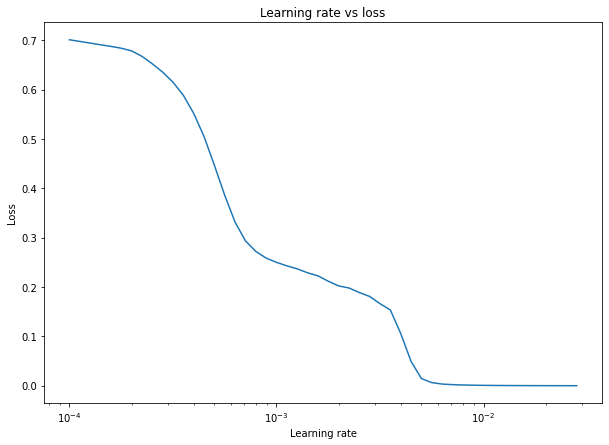

In [ ]:
# Plot the learning rate vs Loss
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
# Evaluate the model_2
model_2.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 1.6052e-04 - accuracy: 1.0000


[0.00016052070714067668, 1.0]

In [ ]:
# Let's create the model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(train_data, train_labels, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.5625
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7613
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.8462
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.8675
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.8725
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.8662
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.8725
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8775
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8863
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8950
Epoch 11/50
25/25 [

In [ ]:
# Evaluate our model
model_3.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.8900


[0.21548298001289368, 0.8899999856948853]

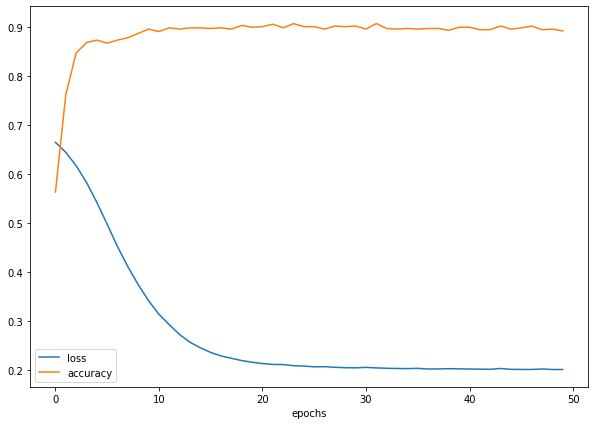

In [ ]:
# Plot the accuracy and loss curves
pd.DataFrame(history_3.history).plot(figsize=(10, 7), xlabel="epochs")

In [ ]:
# Write a plot_decision boundary function:

import numpy as np
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predict one these)
  X_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
  # print(X_in[:10])
  # Make prediction
  y_pred = model.predict(X_in)
  
  # Check for the multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape out prediction to get them already
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

[[-1.16175082 -0.6716972 ]
 [-1.12815094 -0.6716972 ]
 [-1.09455106 -0.6716972 ]
 [-1.06095118 -0.6716972 ]
 [-1.0273513  -0.6716972 ]
 [-0.99375142 -0.6716972 ]
 [-0.96015153 -0.6716972 ]
 [-0.92655165 -0.6716972 ]
 [-0.89295177 -0.6716972 ]
 [-0.85935189 -0.6716972 ]]
doing binary classification


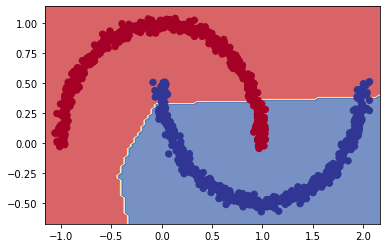

In [ ]:
plot_decision_boundary(model_3, X, y)

[[-1.16175082 -0.6716972 ]
 [-1.12815094 -0.6716972 ]
 [-1.09455106 -0.6716972 ]
 [-1.06095118 -0.6716972 ]
 [-1.0273513  -0.6716972 ]
 [-0.99375142 -0.6716972 ]
 [-0.96015153 -0.6716972 ]
 [-0.92655165 -0.6716972 ]
 [-0.89295177 -0.6716972 ]
 [-0.85935189 -0.6716972 ]]
doing binary classification


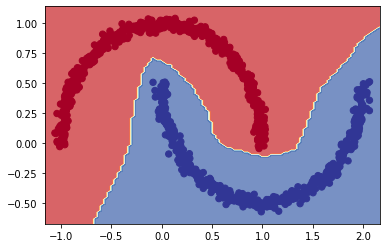

In [ ]:
plot_decision_boundary(model_2, X, y)

doing binary classification
doing binary classification


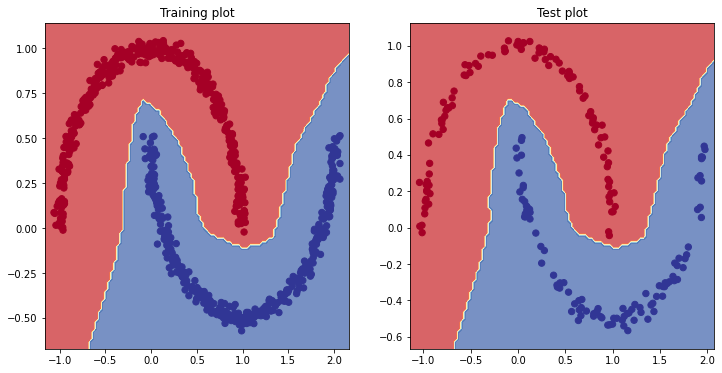

In [ ]:
# Plot the decision boudaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training plot")
plot_decision_boundary(model_2, X=train_data, y=train_labels)
plt.subplot(1, 2, 2)
plt.title("Test plot")
plot_decision_boundary(model_2, X=test_data, y=test_labels)

# 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# At first I will normalized the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [ ]:
# Let's build the model but this time I will increase the number of Dense layers by one

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2228 - accuracy: 0.5265
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7745 - accuracy: 0.7208
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7203 - accuracy: 0.7411
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.7495
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6793 - accuracy: 0.7548
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6692 - accuracy: 0.7584
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6609 - accuracy: 0.7611
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6542 - accuracy: 0.7631
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6474 - accuracy: 0.7653
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.640

In [ ]:
# Let's valuate our model
model_4.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 0.6233 - accuracy: 0.7851


[0.6232854127883911, 0.785099983215332]

In [ ]:
# How about train model with validation data ?
model_4.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=40,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5660 - accuracy: 0.8038 - val_loss: 0.6158 - val_accuracy: 0.7855
Epoch 2/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5653 - accuracy: 0.8050 - val_loss: 0.6382 - val_accuracy: 0.7803
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5637 - accuracy: 0.8046 - val_loss: 0.6165 - val_accuracy: 0.7884
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5642 - accuracy: 0.8052 - val_loss: 0.6184 - val_accuracy: 0.7876
Epoch 5/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5635 - accuracy: 0.8040 - val_loss: 0.6226 - val_accuracy: 0.7853
Epoch 6/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5632 - accuracy: 0.8055 - val_loss: 0.6195 - val_accuracy: 0.7873
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5623 - accuracy: 0.8055 - val_loss: 0.6263 - val_accuracy:

In [ ]:
# How we can improve our model ?

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1198 - accuracy: 0.6197 - val_loss: 0.7557 - val_accuracy: 0.7340
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6627 - accuracy: 0.7681 - val_loss: 0.6296 - val_accuracy: 0.7816
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5753 - accuracy: 0.8015 - val_loss: 0.5781 - val_accuracy: 0.7969
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5436 - accuracy: 0.8106 - val_loss: 0.5512 - val_accuracy: 0.8068
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5214 - accuracy: 0.8148 - val_loss: 0.5690 - val_accuracy: 0.7911
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5044 - accuracy: 0.8206 - val_loss: 0.5412 - val_accuracy: 0.8109
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4941 - accuracy: 0.8246 - val_loss: 0.5661 - val_accuracy:

In [ ]:
# Evaluate our model 
model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.8241


[0.5049957633018494, 0.8241000175476074]

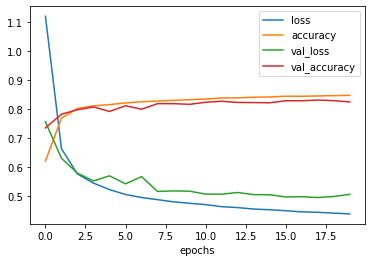

In [ ]:
# Plot data loss curves
pd.DataFrame(history_5.history).plot(xlabel="epochs")

In [ ]:
# How about we add one more layer ?

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(train_data_norm,
                        train_labels,
                        epochs=25,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9826 - accuracy: 0.6284 - val_loss: 0.7114 - val_accuracy: 0.7360
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6306 - accuracy: 0.7697 - val_loss: 0.6048 - val_accuracy: 0.7950
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5508 - accuracy: 0.8092 - val_loss: 0.5793 - val_accuracy: 0.7941
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5267 - accuracy: 0.8173 - val_loss: 0.5479 - val_accuracy: 0.8106
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5148 - accuracy: 0.8204 - val_loss: 0.5434 - val_accuracy: 0.8131
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8233 - val_loss: 0.5699 - val_accuracy: 0.7979
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4980 - accuracy: 0.8239 - val_loss: 0.5299 - val_accuracy:

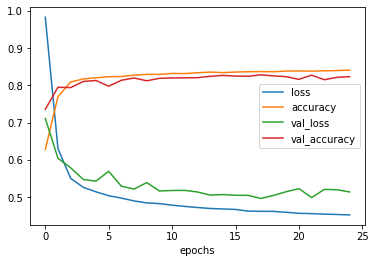

In [ ]:
pd.DataFrame(history_6.history).plot(xlabel="epochs")

In [ ]:
# Let find the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create the learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

# 4. Fit the model
history_7 = model_7.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8594 - accuracy: 0.2888 - val_loss: 1.4279 - val_accuracy: 0.4226
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1600 - accuracy: 0.5822 - val_loss: 0.9851 - val_accuracy: 0.6538
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8326 - accuracy: 0.6985 - val_loss: 0.7846 - val_accuracy: 0.7210
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7216 - accuracy: 0.7460 - val_loss: 0.7091 - val_accuracy: 0.7554
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6592 - accuracy: 0.7734 - val_loss: 0.6563 - val_accuracy: 0.7734
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6112 - accuracy: 0.7916 - val_loss: 0.6153 - val_accuracy: 0.7884
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5752 - accuracy: 0.8058 - val_loss: 0.5916 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

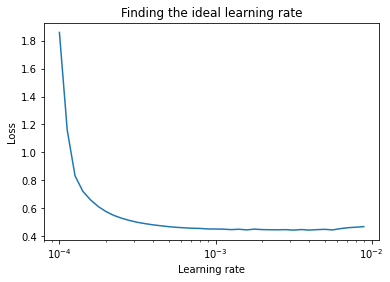

In [ ]:
# Plot the learning rate decay curve

import matplotlib.pyplot as plt

lrs = 1e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 8s 2ms/step - loss: 1.1490 - accuracy: 0.5693 - val_loss: 0.7979 - val_accuracy: 0.7267
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7074 - accuracy: 0.7462 - val_loss: 0.6965 - val_accuracy: 0.7458
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6386 - accuracy: 0.7656 - val_loss: 0.6670 - val_accuracy: 0.7547
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6083 - accuracy: 0.7742 - val_loss: 0.6266 - val_accuracy: 0.7722
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5864 - accuracy: 0.7810 - val_loss: 0.6262 - val_accuracy: 0.7782
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5691 - accuracy: 0.7876 - val_loss: 0.6069 - val_accuracy: 0.7775
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5603 - accuracy: 0.7904 - val_loss: 0.5861 - val_accuracy:

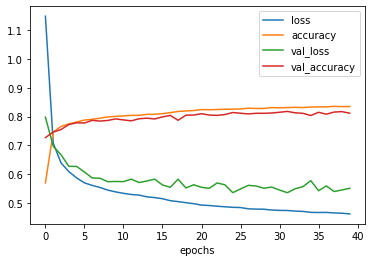

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history_8.history).plot(xlabel="epochs")

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_9 = model_9.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8421 - accuracy: 0.6923 - val_loss: 0.5526 - val_accuracy: 0.8092
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5146 - accuracy: 0.8208 - val_loss: 0.5084 - val_accuracy: 0.8224
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4725 - accuracy: 0.8346 - val_loss: 0.4991 - val_accuracy: 0.8216
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4462 - accuracy: 0.8427 - val_loss: 0.4769 - val_accuracy: 0.8303
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4322 - accuracy: 0.8477 - val_loss: 0.4744 - val_accuracy: 0.8268
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4199 - accuracy: 0.8510 - val_loss: 0.4825 - val_accuracy: 0.8272
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8544 - val_loss: 0.4579 - val_accuracy:

## Confusion matrix

In [ ]:
 import itertools 
 from sklearn.metrics import confusion_matrix
 import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15) :

  # Create the confusino matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
# Create a small lít so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
y_pred = model_9.predict(test_data_norm)

In [ ]:
y_pred = y_pred.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

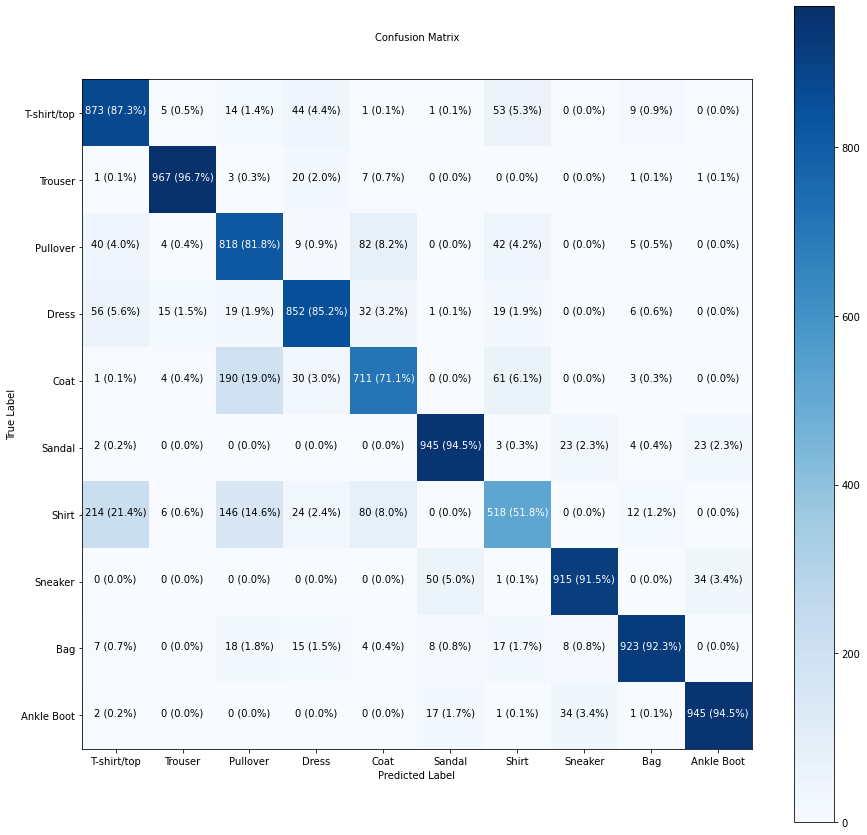

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [18]:
# Create model again 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(15, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7503 - accuracy: 0.7240 - val_loss: 0.5024 - val_accuracy: 0.8236
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4439 - accuracy: 0.8417 - val_loss: 0.4705 - val_accuracy: 0.8309
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4064 - accuracy: 0.8548 - val_loss: 0.4458 - val_accuracy: 0.8359
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3868 - accuracy: 0.8608 - val_loss: 0.4369 - val_accuracy: 0.8472
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3737 - accuracy: 0.8640 - val_loss: 0.4143 - val_accuracy: 0.8492
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3649 - accuracy: 0.8676 - val_loss: 0.4467 - val_accuracy: 0.8398
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3550 - accuracy: 0.8706 - val_loss: 0.4252 - val_accuracy:

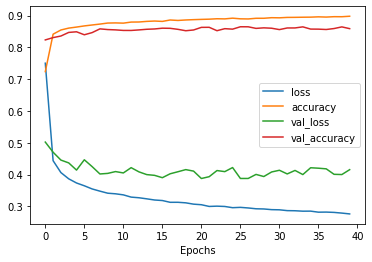

In [19]:
# I think I will create our model again but let visualize it first
pd.DataFrame(history_10.history).plot(xlabel="Epochs")

In [21]:
# Create model again 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])

# 3. Fit the model
history_11 = model_11.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6545 - accuracy: 0.7678 - val_loss: 0.4767 - val_accuracy: 0.8312
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4268 - accuracy: 0.8468 - val_loss: 0.4798 - val_accuracy: 0.8384
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3922 - accuracy: 0.8582 - val_loss: 0.4269 - val_accuracy: 0.8419
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3717 - accuracy: 0.8659 - val_loss: 0.4260 - val_accuracy: 0.8459
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3579 - accuracy: 0.8707 - val_loss: 0.4227 - val_accuracy: 0.8464
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8748 - val_loss: 0.4241 - val_accuracy: 0.8429
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3369 - accuracy: 0.8773 - val_loss: 0.4038 - val_accuracy:

In [22]:
y_pred = model_11.predict(test_data_norm)

In [23]:
y_pred = y_pred.argmax(axis=1)

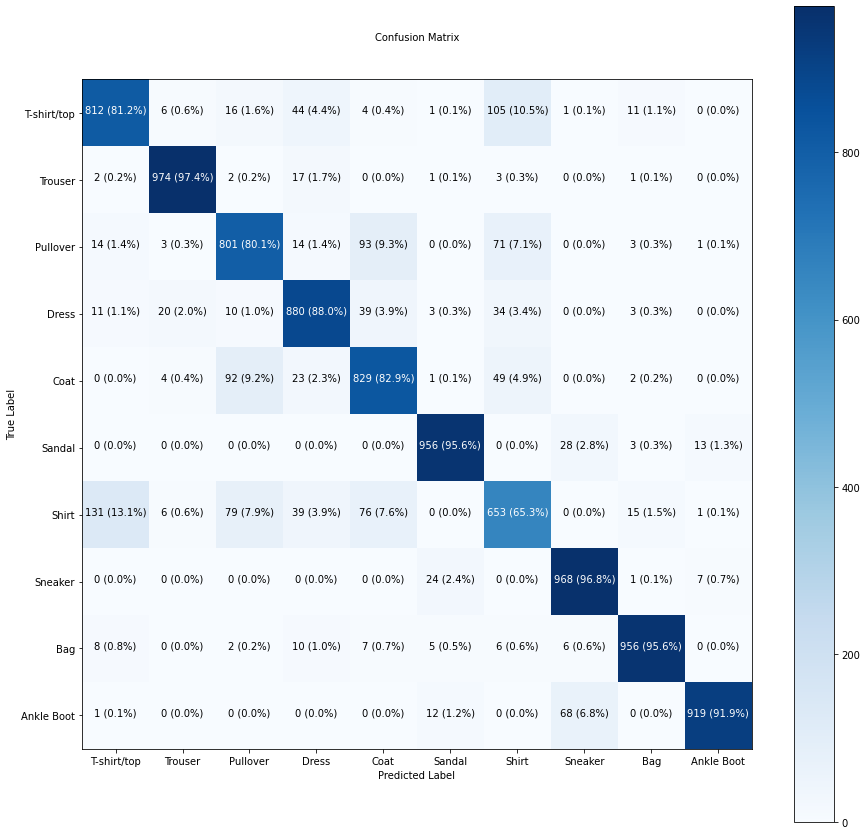

In [24]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [27]:
# I think this time we can do it, let set it again

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
history_12 = model_12.fit(train_data_norm,
                          train_labels,
                          epochs=25,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6657 - accuracy: 0.7573 - val_loss: 0.5083 - val_accuracy: 0.8145
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4530 - accuracy: 0.8376 - val_loss: 0.4457 - val_accuracy: 0.8421
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8519 - val_loss: 0.4442 - val_accuracy: 0.8402
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3908 - accuracy: 0.8601 - val_loss: 0.4236 - val_accuracy: 0.8461
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8635 - val_loss: 0.4209 - val_accuracy: 0.8537
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3613 - accuracy: 0.8692 - val_loss: 0.4538 - val_accuracy: 0.8328
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3544 - accuracy: 0.8727 - val_loss: 0.4168 - val_accuracy:

In [28]:
# I think this time we can do it, let set it again

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=25,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6124 - accuracy: 0.7805 - val_loss: 0.4838 - val_accuracy: 0.8310
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8503 - val_loss: 0.4674 - val_accuracy: 0.8385
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3812 - accuracy: 0.8608 - val_loss: 0.4114 - val_accuracy: 0.8484
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3581 - accuracy: 0.8696 - val_loss: 0.4178 - val_accuracy: 0.8470
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3389 - accuracy: 0.8761 - val_loss: 0.3964 - val_accuracy: 0.8548
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3266 - accuracy: 0.8807 - val_loss: 0.4033 - val_accuracy: 0.8530
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3157 - accuracy: 0.8848 - val_loss: 0.4027 - val_accuracy:

In [29]:
# I think this time we can do it, let set it again

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=25,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5469 - accuracy: 0.8020 - val_loss: 0.4621 - val_accuracy: 0.8303
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3963 - accuracy: 0.8533 - val_loss: 0.4267 - val_accuracy: 0.8441
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8654 - val_loss: 0.3909 - val_accuracy: 0.8576
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8735 - val_loss: 0.3955 - val_accuracy: 0.8569
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3265 - accuracy: 0.8794 - val_loss: 0.3812 - val_accuracy: 0.8603
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3116 - accuracy: 0.8839 - val_loss: 0.3753 - val_accuracy: 0.8624
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3045 - accuracy: 0.8869 - val_loss: 0.3641 - val_accuracy:

## Finally we can train our model with more than 88% accuracy

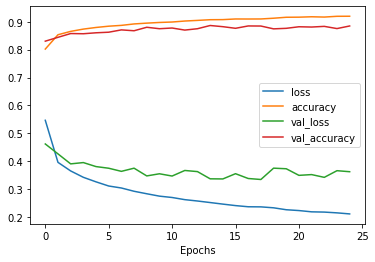

In [30]:
import pandas as pd
pd.DataFrame(history_13.history).plot(xlabel="Epochs")

In [36]:
y_pred = model_13.predict(test_data_norm)
y_pred = y_pred.argmax(axis=1)

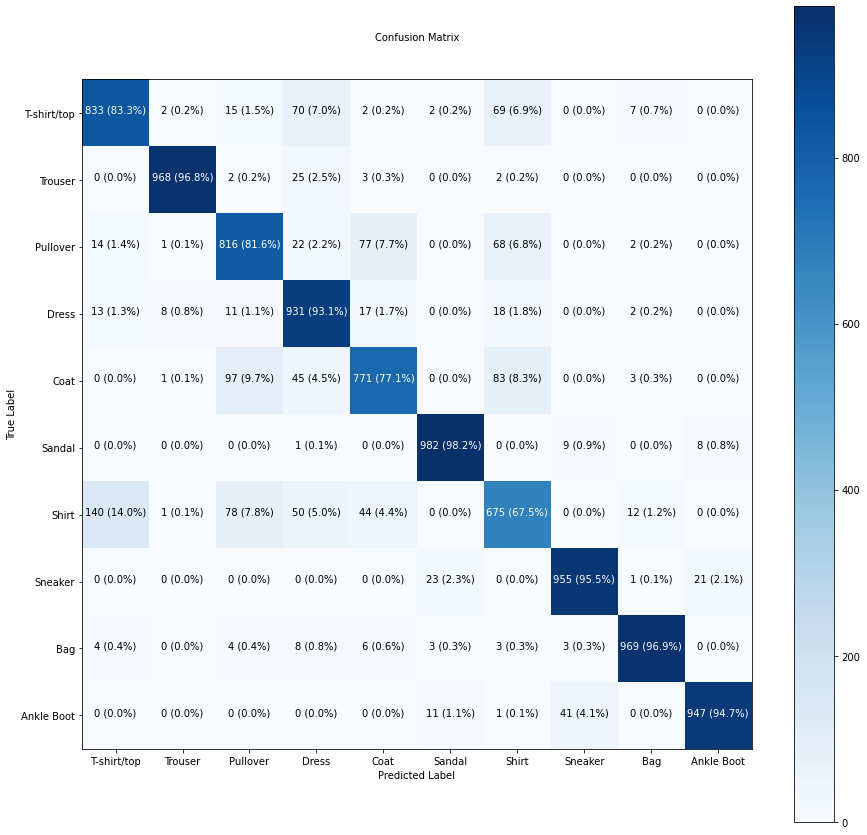

In [37]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

# 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [104]:
def softmax(x):
  return tf.exp(x) / tf.reduce_sum(tf.exp(x))

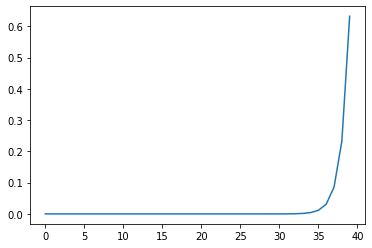

In [107]:
A = tf.cast(tf.range(-20, 20), tf.float32)
plt.plot(softmax(A))

In [109]:
A
softmax(A), A

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([7.2998689e-18, 1.9843103e-17, 5.3939151e-17, 1.4662181e-16,
        3.9855939e-16, 1.0833968e-15, 2.9449777e-15, 8.0052796e-15,
        2.1760605e-14, 5.9151455e-14, 1.6079034e-13, 4.3707342e-13,
        1.1880888e-12, 3.2295603e-12, 8.7788552e-12, 2.3863401e-11,
        6.4867452e-11, 1.7632801e-10, 4.7930920e-10, 1.3028977e-09,
        3.5416428e-09, 9.6271826e-09, 2.6169397e-08, 7.1135794e-08,
        1.9336714e-07, 5.2562638e-07, 1.4288007e-06, 3.8838830e-06,
        1.0557488e-05, 2.8698229e-05, 7.8009878e-05, 2.1205284e-04,
        5.7641935e-04, 1.5668703e-03, 4.2591952e-03, 1.1577692e-02,
        3.1471431e-02, 8.5548207e-02, 2.3254417e-01, 6.3212055e-01],
       dtype=float32)>, <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   

# 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [128]:
import random

def plot_random_predictions(model, images, true_labels, classes):
  plt.figure(figsize=(10, 10))
  for i in range(9) :
    ax = plt.subplot(3, 3, i+1)
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wring
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"
    
    # Add xlabel information (prediction/ true label)
    plt.xlabel("Pred: {} {:2.0f}% (True : {})".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label),
               color=color) # Set the color to green red depending on the predict is right or false



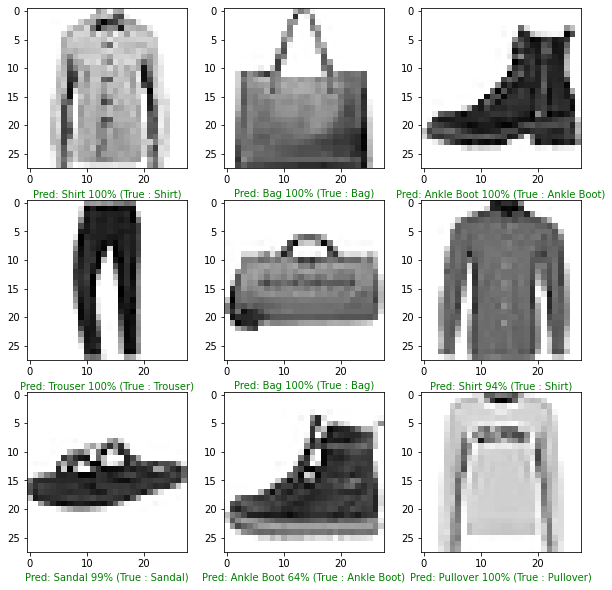

In [129]:
plot_random_predictions(model=model_13, 
                        images=test_data_norm,
                        true_labels=test_labels,
                        classes=class_names)

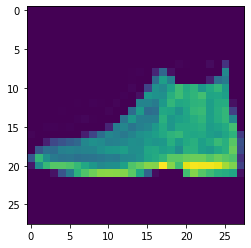

In [123]:
plt.imshow(test_data_norm[0]*50000)

In [124]:
test_data_norm[0]*50000

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0. 

# 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [133]:
import random

def plot_random_predictions_2(model, images, true_labels, classes, cer_class):
  plt.figure(figsize=(10, 10))
  for i in range(9) :
    ax = plt.subplot(3, 3, i+1)
    # Set up random integer
    while True:
      i = random.randint(0, len(images))
      if class_names[true_labels[i]] == cer_class:
          break

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wring
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"
    
    # Add xlabel information (prediction/ true label)
    plt.xlabel("Pred: {} {:2.0f}% (True : {})".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label),
               color=color) # Set the color to green red depending on the predict is right or false


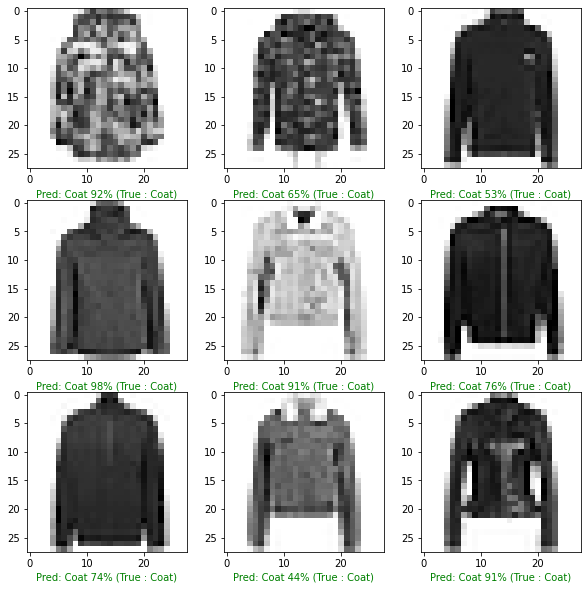

In [136]:
plot_random_predictions_2(model=model_13, 
                        images=test_data_norm,
                        true_labels=test_labels,
                        classes=class_names,
                        cer_class="Coat")